In [19]:
#Lazar Novakovic Assignment #2 
#New Due date, tuesday before class 18 Feb 2020 before 11:30 am.

In [2]:
# There are two useful forms of the quadratic equation. 
# Both should yield equivalent roots. 

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import math

def roots(a,b,c):
    r1= (-b + (b**2 -4*a*c)**(0.5))/(2*a)
    r2= (- (b + (b**2 -4*a*c)**(0.5)))/(2*a)
    r3= (-2*c)/(b+(b**2-4*a*c)**(0.5))
    r4= (-2*c)/(b+-(b**2-4*a*c)**(0.5))
     
    return [r1,r2,r3,r4]

# I will define this function, which will return the 4 roots of a quadratic order equation. 

In [66]:
# A simple function whose roots can are known is a = 1, b = 5, c = 6.
# The roots are known to be both x = -2, x = -3.

a=[]

a = roots(1,5,6)

print(a)


[-2.0, -3.0, -2.0, -3.0]




# Now, time to investigate how errors change and relate to machine precision.
### The reccommended test is using the form of a =1, b = -1, c = 10**-n. n being in the the natural numbers.
### Now, in order to compare error we must know the true analytical value. Obviously we can't use the program to calculate
### the true value, as those are the values we trying to test. In order to use an approximate true value
### (Note: it will be subject to truncation error) we can use a taylor series approximation. This will be necessary for the
### discriminant only. 

### The expansion of the form (1+ax)**n = 1 + nax + (n(n-1)*(ax)**2)/(2!) + ...
### Smaller values of of a allow better approximations for first term truncation.

### Rearranging the discriminant to this form makes b = pm.1 useful...

$$ (b^2 - 4ac)^(0.5) = (1-410^(-n))^(0.5) ~ 1 -2*10^(-n)$$...
$$(b^2 -4ac)^(0.5)$$
$$([1-\frac{4ac}{b^2}]^{\frac{1}{2}})*(b^2)^{\frac{1}{2}}$$ ~ $$(1-\frac{2ac}{b^2})*(b^2)^{\frac{1}{2}}$$
$$ \pm |b|*(1-\frac{2ac}{b^2}) $$

### Notice that after the first order approximation arithmetic simplifications of the forms can be made.

##### 2-2*c
##### 2*c/2
##### (-2*c)/(-1+(1-2*c))
##### (-2*c)/(-2 -2*c)

In [67]:
def roots2(n):
    c = 10**(-n)
    
    #r1= (1 + (1 + -2*c))/(2)
    #r2= (1 - (1 + -2*c))/(2)
    #r3= (-2*c)/(-1+ (1 + -2*c))
    #r4= (-2*c)/(-1-(1 + -2*c))
    
    r1= -c+1
    r2= c
    r3= 1
    r4= (c)/(1+-c)
    
    return [r1,r2,r3,r4]

In [68]:
b=[]
b= roots2(1)
print(b)

[0.9, 0.1, 1, 0.11111111111111112]


In [69]:
print(roots(1,-1,10**(-15)))
roots2(15)

[0.999999999999999, 9.992007221626409e-16, 1.0007999171934436, 1.000000000000001e-15]


[0.999999999999999, 1e-15, 1, 1.000000000000001e-15]

In [70]:
N = []
relE1 =[]
relE2 =[]
relE1_t = []
relE2_t = []


for j in range(15): 
    j=j+1
    print(j)
    d = []
    f = []
    d = roots(1,-1,10**(-j))
    f = roots2(j)

    

    N.append(10.0**(-j))
    
    print("c =",str(10.0**-j),"n =", j)
    
    for k in range(4):
        
        relE = abs((-f[k]+d[k])/(f[k]))
        
        if(k==0):
            relE1.append(relE) 
        elif(k==1):
            relE2.append(relE)
        elif(k==2):
            relE1_t.append(relE)
        else:
            relE2_t.append(relE)
            
        
        print("x:",k+1,"Root:",d[k])
        print("x_t:",k+1,"Root:",f[k])

        print("Relative Error",relE*100.0,"%")
    print(" ")
    
print(N)
print(relE1)
print(relE2)
print(relE1_t)
print(relE2_t)

1
c = 0.1 n = 1
x: 1 Root: 0.8872983346207417
x_t: 1 Root: 0.9
Relative Error 1.4112961532509243 %
x: 2 Root: 0.1127016653792583
x_t: 2 Root: 0.1
Relative Error 12.701665379258293 %
x: 3 Root: 0.8872983346207418
x_t: 3 Root: 1
Relative Error 11.27016653792582 %
x: 4 Root: 0.11270166537925831
x_t: 4 Root: 0.11111111111111112
Relative Error 1.4314988413324734 %
 
2
c = 0.01 n = 2
x: 1 Root: 0.9898979485566356
x_t: 1 Root: 0.99
Relative Error 0.010308226602463904 %
x: 2 Root: 0.010102051443364402
x_t: 2 Root: 0.01
Relative Error 1.0205144336440133 %
x: 3 Root: 0.9898979485566336
x_t: 3 Root: 1
Relative Error 1.01020514433664 %
x: 4 Root: 0.01010205144336438
x_t: 4 Root: 0.010101010101010102
Relative Error 0.010309289307360544 %
 
3
c = 0.001 n = 3
x: 1 Root: 0.998998997994986
x_t: 1 Root: 0.999
Relative Error 0.0001003008021983399 %
x: 2 Root: 0.0010010020050140178
x_t: 2 Root: 0.001
Relative Error 0.10020050140177941 %
x: 3 Root: 0.9989989979950102
x_t: 3 Root: 1
Relative Error 0.1001002

## Now, notice a few key points when plotting all 4 relative errors.
## 2 pairs of roots follow similar patterns. 
## Notice that the positive root of one form corresponds to the negative root of the other form, and vice versa.
## This may be due to the similar form which the arithmetic is done by the 2 respective roots. 

### The form of the positive root from form 1 is a negative value summed with a positive value.
### Similarily, the form of the negative root of the second form is a negative summed with a positive term. 
### As for the other two roots. The negative root of form 1 and the positive root of form 1 also follow similar arithmetic form.

### The double negative terms of form 1 can be writtten as the sum of two positive terms, with a negative factored out. 

### This all helps address the similar relative error curves. As we know, relative error can be largely dependant on the arithemetic form of the equation. Subraction of two closely valued terms can lead to a large error, therefore, the relative error curves most likely most dependant on the terms with opposite signs. 

### We can therefore assume that error can be reduced for each root by first choosing the form which contains similar signs.

### Of course, these patterns may differ for varying values of a, b, and c. For a more precise analysis on error reduction would be to of course follow the same process done above in order to determine the best arithmetic form of the equation in order to reduce error.


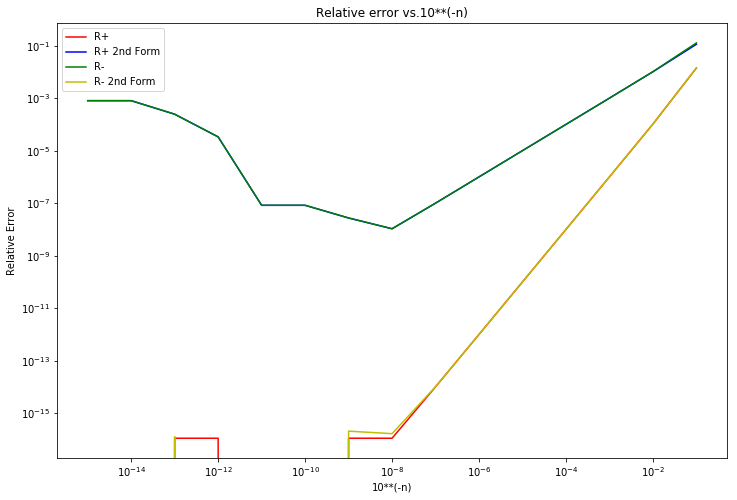

In [71]:
plt.figure(figsize=(12, 8))

plt.plot(N, relE1, 'r-', label='R+')
plt.plot(N, relE1_t, 'b-', label='R+ 2nd Form')
plt.plot(N, relE2, 'g-', label='R- ')
plt.plot(N, relE2_t, 'y-', label='R- 2nd Form')
plt.xlabel("10**(-n)")
plt.ylabel("Relative Error")
plt.xscale('log')
plt.yscale('log')
plt.title('Relative error vs.10**(-n)')
plt.legend()
plt.show()

In [72]:
min(relE1_t)

1.0575874287432896e-08

In [73]:
relE1

[0.014112961532509244,
 0.00010308226602463904,
 1.003008021983399e-06,
 1.0003000861201785e-08,
 1.0000311772896117e-10,
 9.999788782587567e-13,
 1.0103030534391978e-14,
 1.110223035727387e-16,
 1.1102230257353797e-16,
 0.0,
 0.0,
 1.1102230246262669e-16,
 1.1102230246252677e-16,
 0.0,
 0.0]

In [74]:
relE2

[0.12701665379258292,
 0.010205144336440132,
 0.0010020050140177941,
 0.00010002000494586309,
 1.000020166755524e-05,
 1.0000066339896466e-06,
 9.994882792603219e-08,
 1.0575874377532638e-08,
 2.7229219705550952e-08,
 8.274037096265818e-08,
 8.274037105959341e-08,
 3.33894311097739e-05,
 0.0002441663250465657,
 0.0007992778373591124,
 0.0007992778373591912]

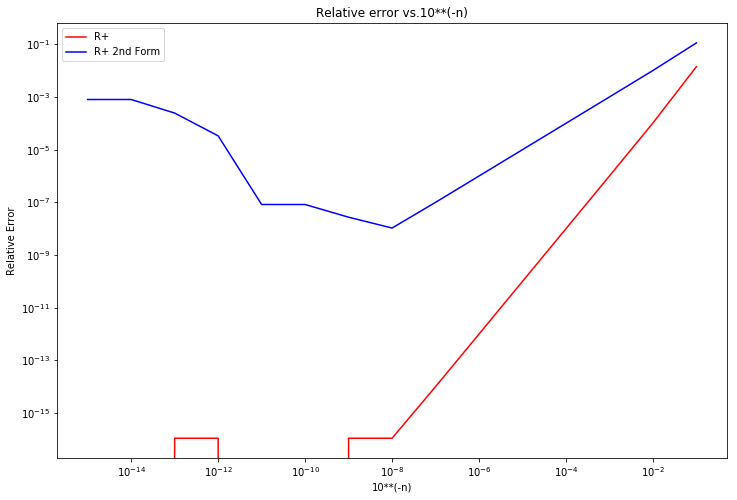

In [75]:
plt.figure(figsize=(12, 8))

plt.plot(N, relE1, 'r-', label='R+')
plt.plot(N, relE1_t, 'b-', label='R+ 2nd Form')
#plt.plot(N, relE2, 'g-', label='R- ')
#plt.plot(N, relE2_t, 'y-', label='R- 2nd Form')
plt.xlabel("10**(-n)")
plt.ylabel("Relative Error")
plt.xscale('log')
plt.yscale('log')
plt.title('Relative error vs.10**(-n)')
plt.legend()
plt.show()

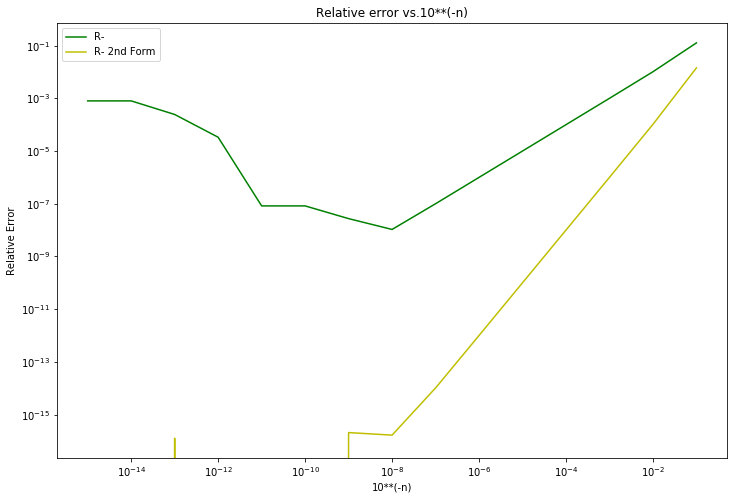

In [76]:
plt.figure(figsize=(12, 8))

#plt.plot(N, relE1, 'r-', label='R+')
#plt.plot(N, relE1_t, 'b-', label='R+ 2nd Form')
plt.plot(N, relE2, 'g-', label='R- ')
plt.plot(N, relE2_t, 'y-', label='R- 2nd Form')
plt.xlabel("10**(-n)")
plt.ylabel("Relative Error")
plt.xscale('log')
plt.yscale('log')
plt.title('Relative error vs.10**(-n)')
plt.legend()
plt.show()

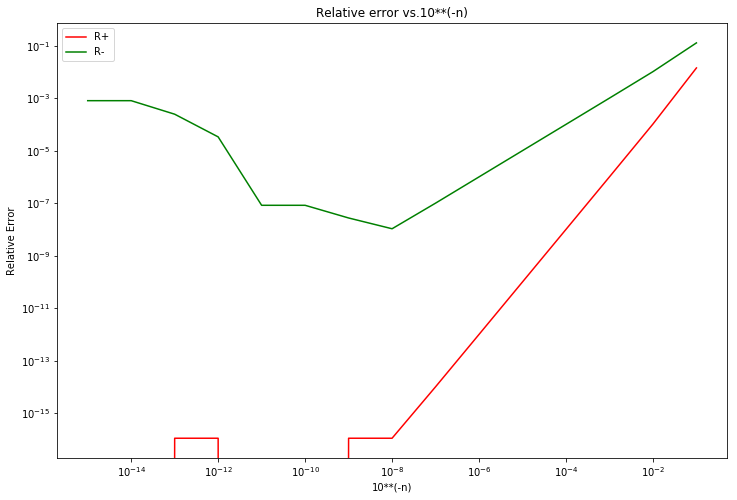

In [77]:
plt.figure(figsize=(12, 8))

plt.plot(N, relE1, 'r-', label='R+')
#plt.plot(N, relE1_t, 'b-', label='R+ 2nd Form')
plt.plot(N, relE2, 'g-', label='R- ')
#plt.plot(N, relE2_t, 'y-', label='R- 2nd Form')
plt.xlabel("10**(-n)")
plt.ylabel("Relative Error")
plt.xscale('log')
plt.yscale('log')
plt.title('Relative error vs.10**(-n)')
plt.legend()
plt.show()

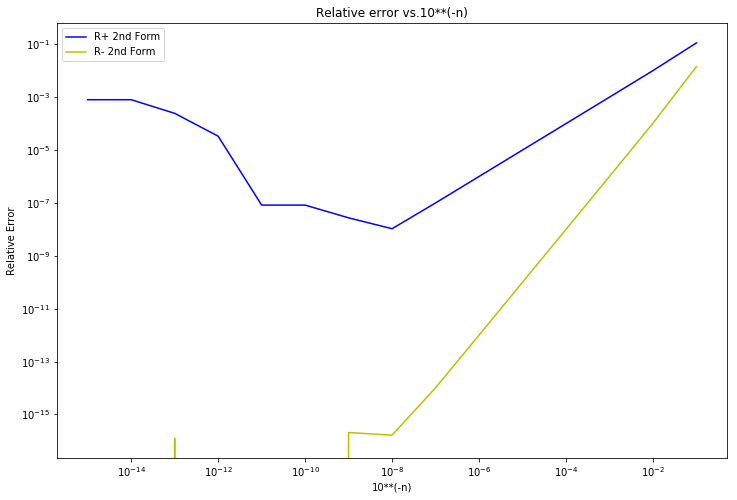

In [78]:
plt.figure(figsize=(12, 8))

#plt.plot(N, relE1, 'r-', label='R+')
plt.plot(N, relE1_t, 'b-', label='R+ 2nd Form')
#plt.plot(N, relE2, 'g-', label='R- ')
plt.plot(N, relE2_t, 'y-', label='R- 2nd Form')
plt.xlabel("10**(-n)")
plt.ylabel("Relative Error")
plt.xscale('log')
plt.yscale('log')
plt.title('Relative error vs.10**(-n)')
plt.legend()
plt.show()

### Another key point to note is that for the case of the opposite-signed forms there is a minimum which can be clearly determined. The similar sign terms also appear to have a minimum, however the precise value of 10^(-n) which minimizes the relative error is not clear. This is due to the relative error being less than the machine precision, roughly 10^(-16), which is also seen on the graph. This yields a jagged change in the shape of the similar-signed forms. This shows that once an error of 10^-(16) is reached, between 10^(-9) and 10^(-13) all error is rounded to 0, as it is less than machine precision.